In [1]:
# Heatmaps and Grad-CAM
import sys
sys.path.insert(0, '../../../common')
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from cam import get_img_array, make_gradcam_heatmap, display_heatmaps
import cv2
import matplotlib.pyplot as plt

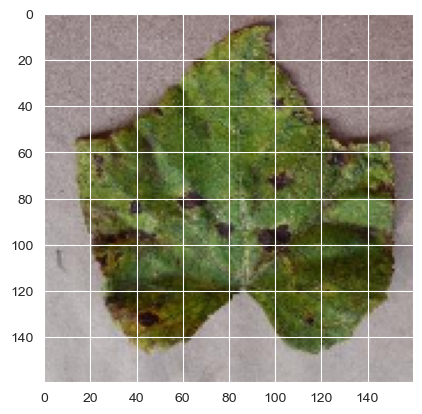

KeyboardInterrupt: 

In [2]:
# Heatmap
images = [
    {
        "path": "../../../Datas/shuffle/LEAF_BLIGHT/0cd6d9f4-ffa6-49a6-aa21-a7955d1bef56___FAM_L.Blight 1641.JPG"
    },
    {
        "path": "../../../Datas/shuffle/LEAF_BLIGHT/grid_0cd6d9f4-ffa6-49a6-aa21-a7955d1bef56___FAM_L.Blight 1641.JPG"
    },
    {
        "path": "../../../Datas/shuffle/BLACK_ROT/0b11ac6a-9e24-4d9c-bbe9-e180eb81ff38___FAM_B.Rot 0581.JPG"
    },
    {
        "path": "../../../Datas/shuffle/BLACK_ROT/grid_0b11ac6a-9e24-4d9c-bbe9-e180eb81ff38___FAM_B.Rot 0581.JPG"
    }
]

img_width, img_height = 160, 160

# Load the model
model = load_model('model.h5')

# Select last conv layer
last_conv_layer_name = "Conv_1"

# Remove last layer's softmax
model.layers[-1].activation = None

for image in images:
    heatmaps = []
    image_temp = cv2.imread(image["path"])
    image_temp = cv2.resize(image_temp, (img_width, img_height))

    plt.imshow(cv2.cvtColor(image_temp, cv2.COLOR_BGR2RGB))
    plt.show()

    image["array"] = get_img_array(image["path"], size=(img_width, img_height))

    for layer in model.layers:
        if 'Conv' in layer.__class__.__name__:
            try: # Use try/except block to handle layers that can't be handled by Grad-CAM
                heatmap = make_gradcam_heatmap(image["array"], model, layer.name)
                heatmaps.append({
                    "layer_name": layer.name,
                    "image": heatmap
                })
            except Exception as e:
                print(f'Failed to generate Grad-CAM for layer {layer.name}. Reason: {str(e)}')

    # Display heatmaps from all layers until the last max pooling layer
    display_heatmaps(image["path"], heatmaps)

    # Display the chosen image superimposed with heatmaps of each layer until the last max pooling layer
    display_heatmaps(image["path"], heatmaps, True)

